# Boston 인근지역 주택가격 조사

In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from pandas import pivot_table
from pandas import melt
import numpy as np

In [19]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 12          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

## Mission 1: 데이터 기본 정보 분석

### 1-1. 데이터셋의 크기(행렬) 및 데이터 타입 확인

In [37]:
# 크기 확인
origin = load_data('boston')
origin.shape

[data] https://data.hossam.kr/data/kaggle/boston.xlsx
[desc] 보스턴 인근 지역의 인구·환경·교육·범죄·세금 정보 등을 기반으로 주택의 중위가격(MEDV)을 예측하기 위해 수집된 대표적인 회귀 분석용 주택시장 데이터 (출처: https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

field    description
-------  ---------------------------------------------------------------------------------------
CRIM     타운별 1인당 범죄율 (Per capita crime rate by town)
ZN       25,000 sqft 이상 주거용 대지 비율 (Proportion of residential land zoned for large lots)
INDUS    비소매 상업구역 비율 (Proportion of non-retail business acres per town)
CHAS     찰스강 인접 여부 (Charles River dummy variable: 1 if tract bounds river; 0 otherwise)
NOX      대기 오염 정도 (Nitric oxides concentration, parts per 10 million)
RM       주택당 평균 방(Room) 수 (Average number of rooms per dwelling)
AGE      1940년 이전 건축 비율 (Proportion of owner-occupied units built prior to 1940)
DIS      5개 주요 고용센터까지의 거리 (Weighted distances to five Boston employment centers)
RAD      고속도로 접근성 지수 (Index of accessibility to radial highways)
T

(506, 14)

In [38]:
# 데이터 타입 확인
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 1-2. 범주형 변수 (CHAS)의 데이터 타입 변환:

In [33]:
df_chas = df.replace({'CHAS': 1}, 'bounds')
df_chas2 = df_chas.replace({'CHAS': 0}, 'noBounds')
df_chas3 = df_chas2.astype({'CHAS': 'category'})
df_chas3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    int64   
 9   TAX      506 non-null    int64   
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 52.1 KB


### 1-3. 결측치 현황 확인 및 데이터 완성도 평가

In [5]:
origin.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Mission 2: 수치형 변수 기초통계량 분석

### 2-1. 주택가격 (MEDV)과 주요 특성 변수들 (CRIM, RM, LSTAT, NOX)에 대한 기술통계 확인:

In [12]:
df[['CRIM', 'NOX', 'RM', 'LSTAT', 'MEDV']].describe()

,CRIM,NOX,RM,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,0.554695,6.284634,12.653063,22.532806
std,8.601545,0.115878,0.702617,7.141062,9.197104
min,0.006320,0.385000,3.561000,1.730000,5.000000
25%,0.082045,0.449000,5.885500,6.950000,17.025000
50%,0.256510,0.538000,6.208500,11.360000,21.200000
75%,3.677083,0.624000,6.623500,16.955000,25.000000
max,88.976200,0.871000,8.780000,37.970000,50.000000


### 2-2 각 변수의 분포형태 분석, 중심경향성과 산포도 해석하기:

- 수치형 데이터의 중심경향성:
  - mean vs. median: 수치형 데이터의 주요 특성 변수들(CRIM, NOX, RM, LSTAT) 모두에서 데이터가 우편향 되있음이 보인다.
- 수치형 데이터의 산포도:
  - std: 특성변수 CRIM, LSTAT에서 큰 표준편차(≒ 8.60, 7.14) 값을 보여주었고 특성변수 NOX, RM에서 낮은 표준편차(≒ 0.12, 0.70)값을 보여준다.
    - -> 특성변수 CRIM, LSTAT에서는 데이터의 편차가 큰 편이고 특성변수 NOX, RM의 데이터는 고르게 분포하는 경향이 있음을 시사한다.
  - IQR: 
    - IQR < 1: 특성변수(NOX: 0.18) < 특성변수(RM: 0.738)
    - IQR > 1:: 특성변수(CRIM: 3.60) < 특성변수(LSTAT:10.01)

### 2-3. 박스플롯 그려서 이상치 존재여부 확인하기:

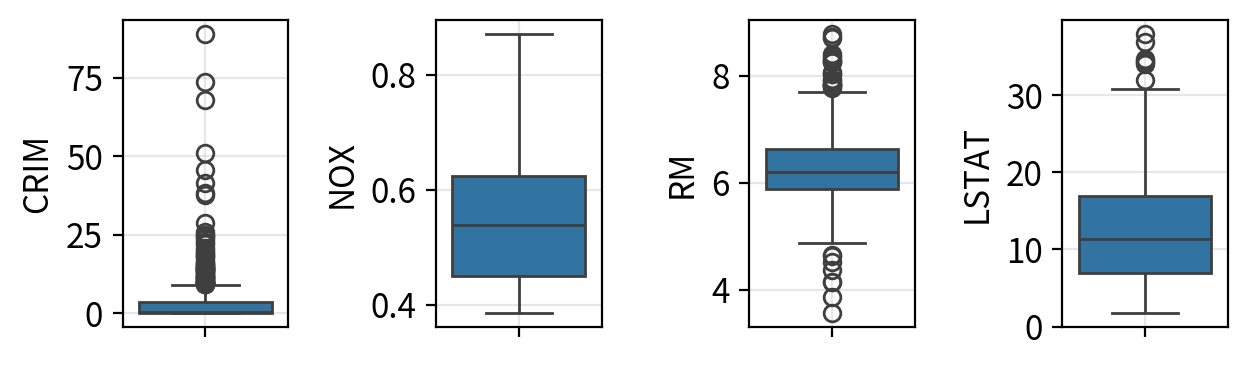

In [20]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 4                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기 + 꾸미기:
for i, col in enumerate(['CRIM', 'NOX', 'RM', 'LSTAT']):
    data = df[df[col] > 0][col]

    sb.boxplot(data, ax = ax[i], orient = 'v')
    ax[i].grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

-  -> 이상치 존재 확인: CRIM, RM, LSTAT

## Mission 3: 분포 정규성 확인

### 3-1. 주택가격(MEDV)의 히스토그램 그리고 분포 형태 분석하기:

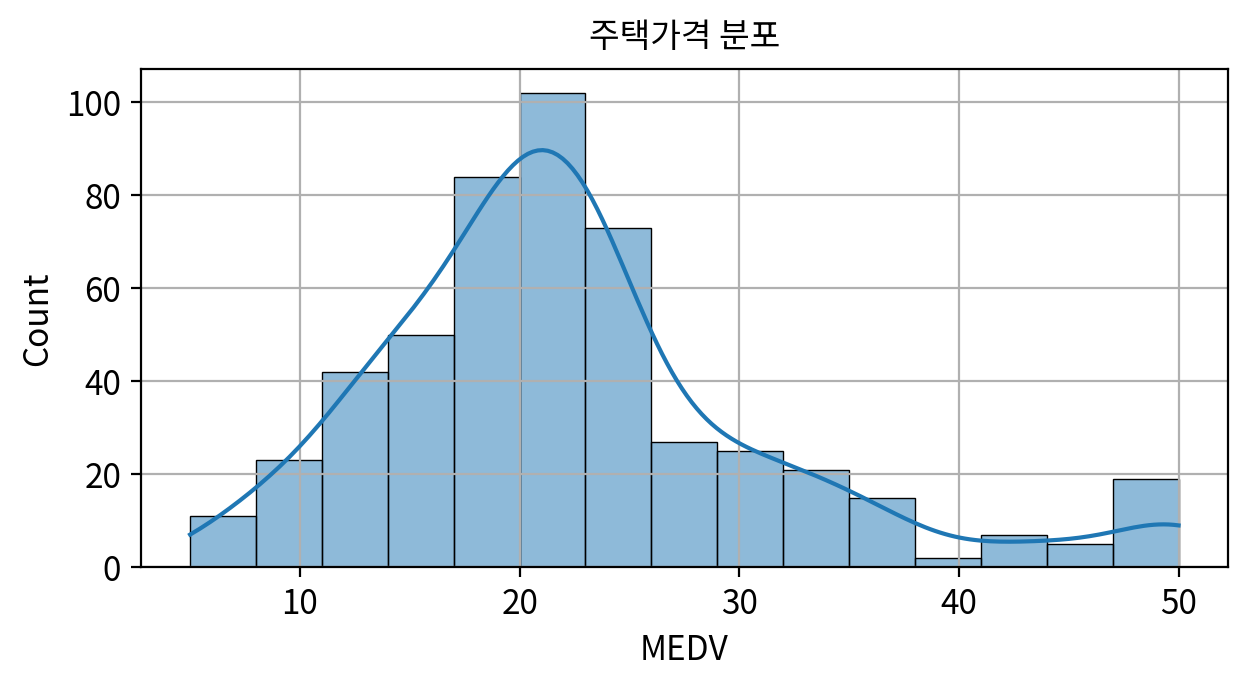

In [21]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) Histogram 그리기: seaborn 사용
sb.histplot(data = df, x = 'MEDV', bins = 15,
            linewidth = 0.5, kde=True)

# 3) 그래프 꾸미기: 
ax.set_title("주택가격 분포", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

- 주택가격의 peak는 20이상 23 미만 부근에서 관측되는데
- 40 초과 50 이하의 구간에서도 상당수의 주택가격이 분포하고 있음이 보인다.

### 3-2. 심하게 치우친 변수들 (CRIM, RM, LSTAT)에 대한 로그변환 적용 및 변환 전후의 분포 비교분석하기:

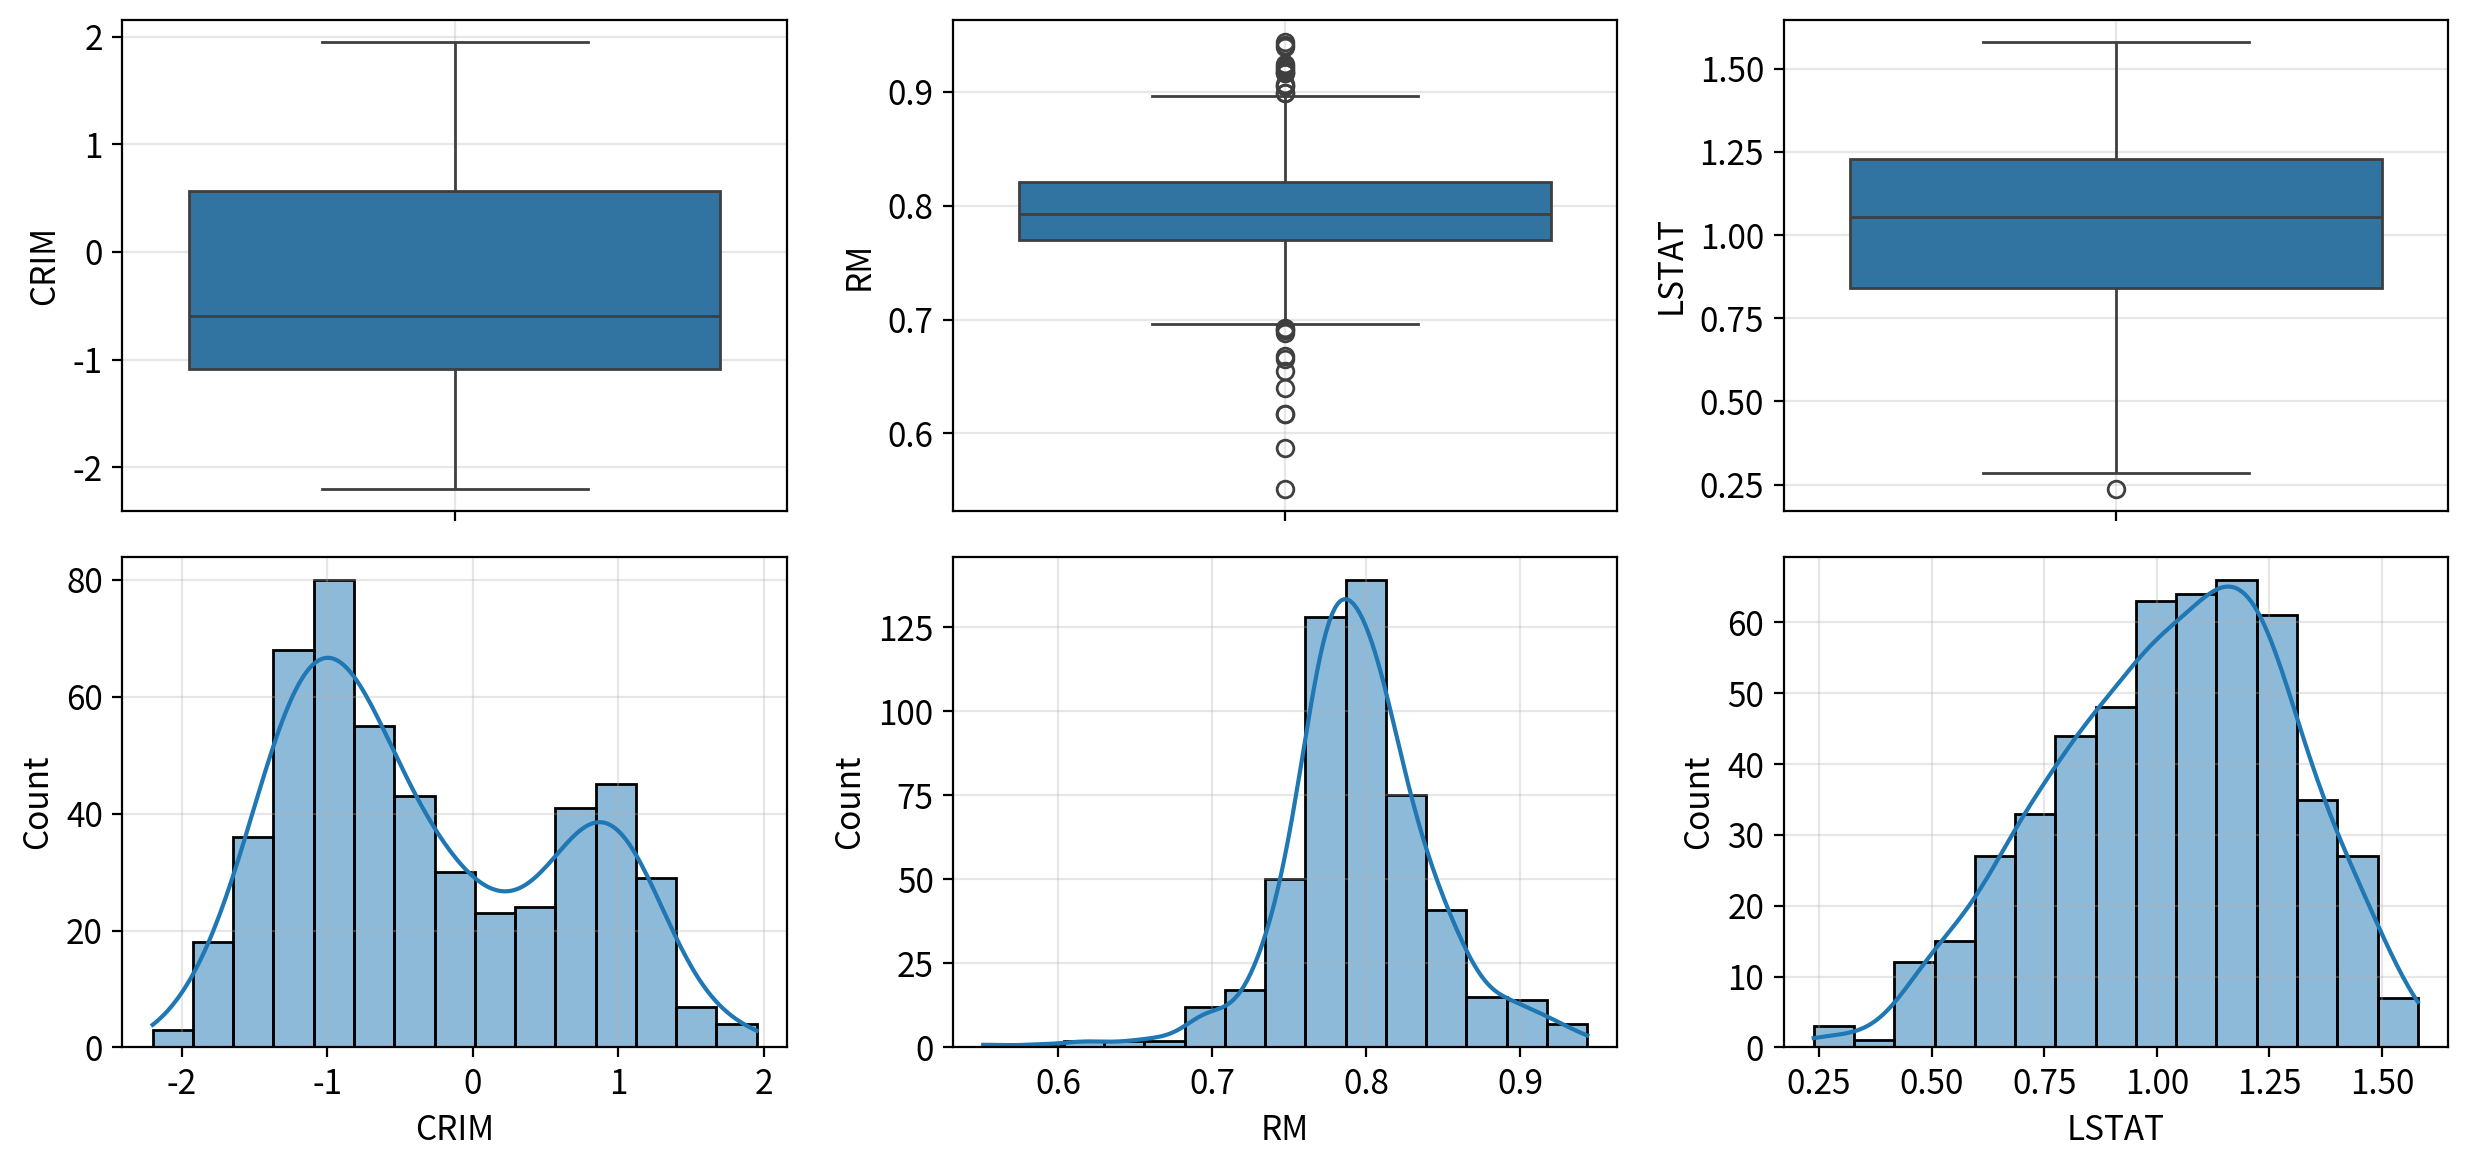

In [24]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 2500             # 그래프 가로 크기
height_px = 1200             # 그래프 세로 크기
rows = 2                    # 그래프 행 수
cols = 3                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기 + 꾸미기:
for i, col in enumerate(['CRIM', 'RM', 'LSTAT']):
    
    data = df[df[col] > 0][col]
    log_data = np.log10(data)

    sb.boxplot(log_data, ax = ax[0][i], orient = 'v')
    ax[0][i].grid(True, alpha=0.3)

    sb.histplot(log_data, ax = ax[1][i], bins=15, kde=True)
    ax[1][i].grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

- 로그변환 후 
  - RM에서는 분포 개형은 어느정도 정규분포화 되었으나, 여전히 이상치가 많음이 확인됨 -> 정규분포로 보기 어려움
  - LSTAT은 여전히 우편향 분포를 보여줌 -> 정규분포와 거리가 멀다
  - CRIM에서는 peak가 두개로 관측됨 -> 다른 변수와의 다중공선성여부 탐색이 필요함

## Mission 4: 범주형 변수 분석

### 4-1 찰스강변 여부(CHAS) 변수의 빈도분석 수행하기:

In [34]:
df_chas3.describe(include='category')

,CHAS
count,506
unique,2
top,noBounds
freq,471


### 4-2. 강변 위치에 따른 주탁가격 차이를 기초통계량으로 비교분석하기:

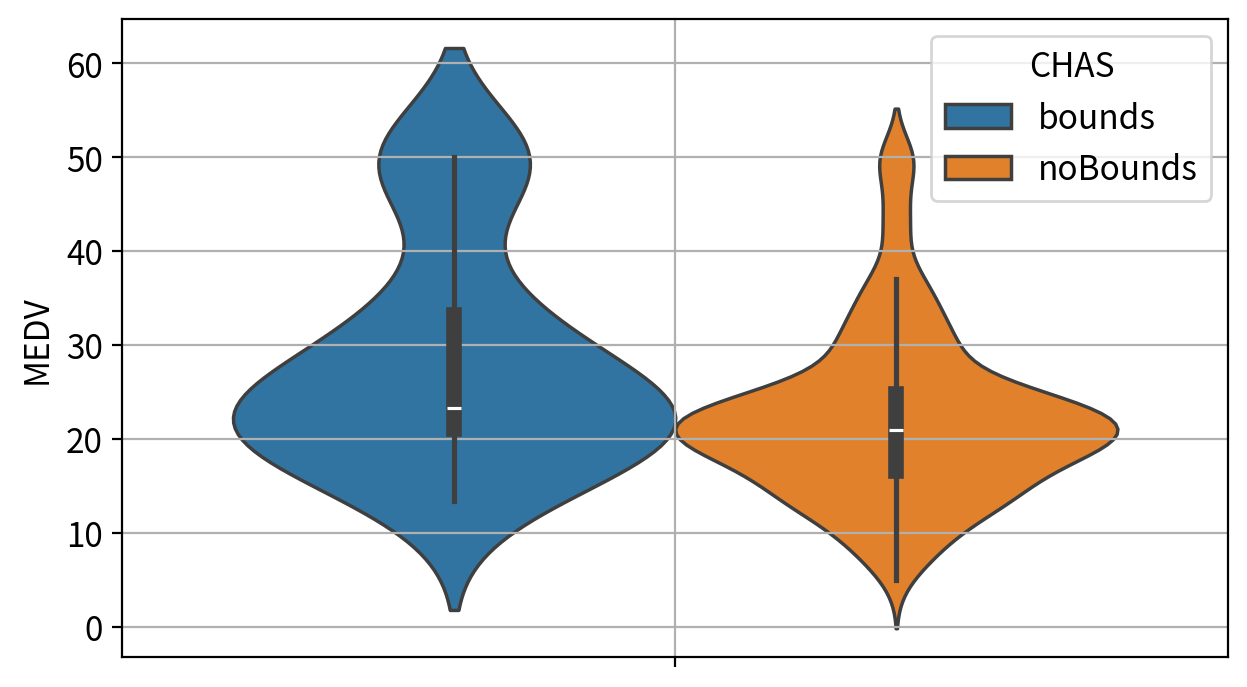

In [36]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) swarmplot 그래프 그리기: seaborn 사용
sb.violinplot(data = df_chas3, y = 'MEDV', hue = 'CHAS')

# 3) 그래프 꾸미기: 
#ax.set_title("✅", color = '✅', pad = 8, fontsize = 12)
#ax.set_xlabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_ylabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_xlim([✅, ✅])       # x축 범위
#ax.set_ylim([✅, ✅])       # y축 범위
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

- 강변(bounds)에 위치해있을수록 주택 가격(MEDV)이 높아짐을 알 수 있다.

## Mission 5: 종합분석 보고서 작성
 
### **5-1. 종합평가**
- 완성도(Completeness):
  - 결측치:
  - 
- 일관성(Consistency): 
  - RAD와 TAX를 제외한 모든 수치형 변수들은 실수형(float64) 타입으로 일관성을 유지했다
  - CHAS는 강변 위치의 유무를 나타내는 변수로서, 정수형(int64) 타입에서 명목형(category) 변수로 타입 변환이 필요했다.
- 분포특성(Distribution):

### **5-2. 핵심 인사이트 3가지 이상**